<a href="https://colab.research.google.com/github/NDTsi/NDTsi/blob/main/GEO_dataset_exploration_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration of the GSE12828 dataset

can be found in: https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE12828

GSE12828 is a gene expression study focusing on human carotid artery plaques. The research compares gene expression profiles in these plaques to those in various human tissues and cell types. The dataset includes samples from six individuals with symptomatic carotid artery disease.
NCBI

Key Details:

    Title: Expression profiles of human carotid plaques
    Organism: Homo sapiens
    Experiment Type: Expression profiling by array
    Platform: [HG-U133A_2] Affymetrix Human Genome U133A 2.0 Array
    Samples: Six carotid endarterectomy specimens
    Publication: Hägg et al., 2008 (PMID: 19036375)

This dataset is valuable for understanding the molecular mechanisms underlying carotid artery disease and identifying potential biomarkers or therapeutic targets.


The GSE12828 dataset comprises gene expression profiles from human carotid artery plaques, analyzed using the Affymetrix Human Genome U133A 2.0 Array. This platform utilizes microarray technology, which typically provides log-transformed expression values rather than raw counts.

Data Collection Date: The dataset was submitted to the Gene Expression Omnibus (GEO) on June 6, 2008. While the exact dates of sample collection aren't specified in the GEO entry, submissions usually occur shortly after data acquisition and initial analysis.

Data Type: This dataset is derived from bulk microarray analysis, meaning it assesses gene expression across mixed cell populations within the tissue samples. It is not single-cell data, which would involve sequencing individual cells to capture their unique expression profiles.

In [ ]:
pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

# Load the GEO dataset (GSE12828)
url = "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE12nnn/GSE12828/matrix/GSE12828_series_matrix.txt.gz"

# Read the dataset
df = pd.read_csv(url, sep="\t", comment="!", index_col=0)

# Check data structure
print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (22277, 6)
           GSM322080  GSM322081  GSM322082  GSM322083  GSM322084  GSM322085
ID_REF                                                                     
1007_s_at   67.41880   83.92360   66.69830  100.68200   84.85680   95.06930
1053_at     41.63390   37.48540   38.47280   38.96720   24.84490   32.81060
117_at     146.06300   76.50500  143.33500   97.89210  118.80500  102.51200
121_at     115.75000  194.15500  156.60400  169.71200  185.36100  152.66200
1255_g_at    3.66642    1.00602    7.91987    4.71421    1.30283    9.27714


In [ ]:
df

,ID_REF,GSM322080,GSM322081,GSM322082,GSM322083,GSM322084,GSM322085
0,1007_s_at,67.4188,83.9236,66.6983,100.682,84.8568,95.0693
1,1053_at,41.6339,37.4854,38.4728,38.9672,24.8449,32.8106
2,117_at,146.063,76.505,143.335,97.8921,118.805,102.512
3,121_at,115.75,194.155,156.604,169.712,185.361,152.662
4,1255_g_at,3.66642,1.00602,7.91987,4.71421,1.30283,9.27714
...,...,...,...,...,...,...,...
22272,AFFX-ThrX-5_at,0.555565,1.01283,1.40328,0.845857,1.05121,3.77476
22273,AFFX-ThrX-M_at,0.416536,2.84835,0.490347,1.66052,0.799811,1.00378
22274,AFFX-TrpnX-3_at,3.92421,3.76438,0.360282,4.8824,0.563743,0.768801
22275,AFFX-TrpnX-5_at,4.95698,6.50186,6.76248,0.741606,1.92025,0.934562


In [ ]:
# Transpose the dataframe so that genes are rows and samples are columns
df = df.T
df


ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM322080,67.4188,41.6339,146.0630,115.750,3.66642,88.0020,21.3956,2.21517,383.303,8.51991,...,1737.09,1439.47,4629.76,3693.15,0.970230,0.555565,0.416536,3.924210,4.956980,0.272885
GSM322081,83.9236,37.4854,76.5050,194.155,1.00602,92.0412,23.6074,2.98631,208.037,5.37669,...,3195.32,2817.22,8672.67,7043.98,3.023500,1.012830,2.848350,3.764380,6.501860,1.055940
GSM322082,66.6983,38.4728,143.3350,156.604,7.91987,93.5310,31.0872,8.48214,174.893,13.38750,...,1862.02,1553.74,4720.78,3733.28,1.277180,1.403280,0.490347,0.360282,6.762480,0.612002
GSM322083,100.6820,38.9672,97.8921,169.712,4.71421,74.9040,20.2325,8.49910,330.567,9.74426,...,1840.53,1477.16,4826.85,3979.34,0.611063,0.845857,1.660520,4.882400,0.741606,0.593546
GSM322084,84.8568,24.8449,118.8050,185.361,1.30283,67.7903,19.0340,13.67160,141.114,9.15337,...,1523.77,1213.33,4039.97,3206.16,0.980897,1.051210,0.799811,0.563743,1.920250,0.696044
GSM322085,95.0693,32.8106,102.5120,152.662,9.27714,103.1930,14.5584,5.41793,253.923,12.63740,...,1742.90,1454.64,4877.59,3825.43,0.984840,3.774760,1.003780,0.768801,0.934562,0.391182


### Expression matrix as a heatmap

In [ ]:
# Select the top n most variable genes for better visualization
n = 1000

top_genes = df.var().sort_values(ascending=False).head(n)
df_top = df[top_genes.index]
df_top


ID_REF,211430_s_at,221671_x_at,221651_x_at,212788_x_at,AFFX-r2-P1-cre-3_at,217022_s_at,215121_x_at,AFFX-hum_alu_at,209138_x_at,214677_x_at,...,200670_at,201765_s_at,204475_at,211066_x_at,202766_s_at,208612_at,214953_s_at,213067_at,220796_x_at,221872_at
GSM322080,2426.36,2449.57,2463.88,6481.19,4629.76,772.320,1747.33,5819.36,1301.95,1600.36,...,222.406,778.565,126.464,615.430,658.779,678.912,514.525,291.3660,405.548,250.805
GSM322081,8076.38,7836.80,7786.15,10409.00,8672.67,4492.140,4962.91,9310.19,4843.99,5573.66,...,584.113,536.450,429.424,288.404,927.339,899.301,585.156,164.6220,607.634,159.211
GSM322082,5592.96,2952.11,2970.41,5387.81,4720.78,978.462,5097.42,5084.05,5114.61,4392.78,...,322.823,511.945,54.476,499.851,610.091,657.608,450.807,178.1860,621.176,435.899
GSM322083,6008.30,4958.86,4858.83,6267.02,4826.85,3870.390,5216.16,5912.96,4169.47,4635.07,...,390.195,695.009,179.931,618.587,753.898,741.021,251.619,79.0758,326.571,118.632
GSM322084,1658.83,2107.62,2167.68,4924.52,4039.97,679.634,1731.92,4866.54,1600.76,1954.54,...,276.499,416.447,110.262,633.297,560.123,498.079,349.209,275.8730,596.701,407.503
GSM322085,3193.58,2655.34,2515.27,5477.82,4877.59,2611.960,3314.31,5398.14,3656.82,3328.36,...,264.672,600.572,183.261,503.878,747.371,661.555,565.160,453.6250,396.759,332.144


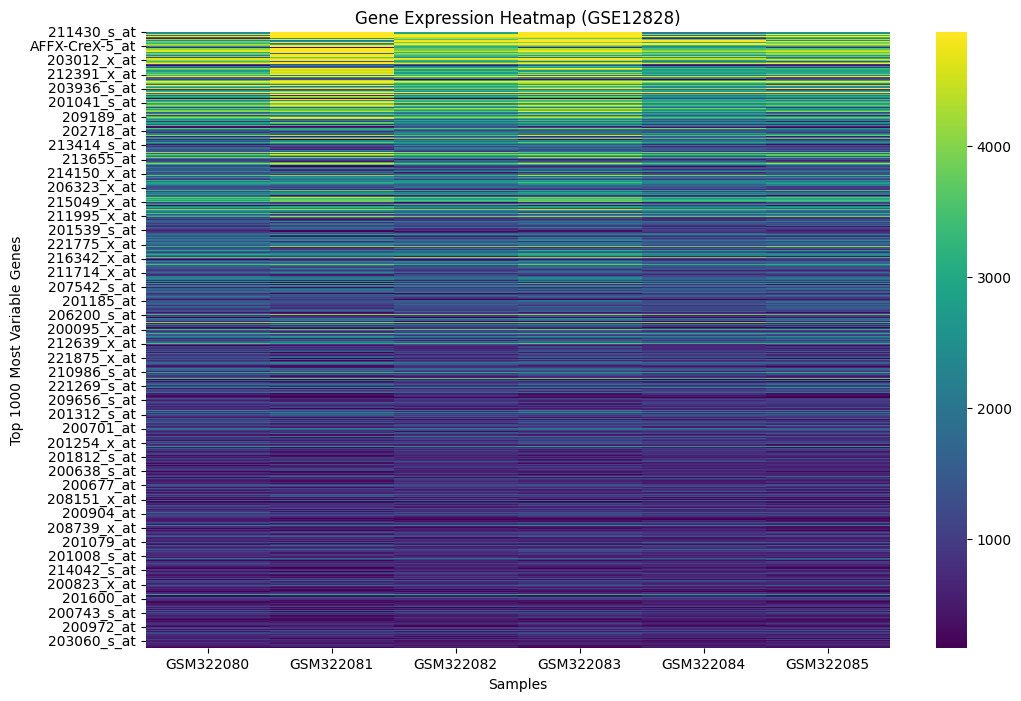

In [ ]:

# Plot the heatmap using the 'viridis' colormap
plt.figure(figsize=(12, 8))
sns.heatmap(df_top.T, cmap="viridis", robust=True)
plt.xlabel("Samples")
plt.ylabel(f"Top {n} Most Variable Genes")
plt.title("Gene Expression Heatmap (GSE12828)")
plt.show()

In [ ]:

# Simulate two conditions: "Healthy" vs "Disease"
# (We assume first 10 samples are 'Healthy' and next 10 are 'Disease')
healthy_samples = df.iloc[:, :10]
disease_samples = df.iloc[:, 10:20]

# Perform differential expression analysis (t-test)
p_values = []
log_fc = []

for gene in df.columns:
    stat, p = ttest_ind(healthy_samples[gene], disease_samples[gene], equal_var=False)
    p_values.append(p)
    log_fc.append(np.log2(disease_samples[gene].mean() / healthy_samples[gene].mean()))

# Create a results DataFrame
results = pd.DataFrame({"Gene": df.columns, "logFC": log_fc, "p-value": p_values})
results["-log10(p-value)"] = -np.log10(results["p-value"])

# Plot a volcano plot
plt.figure(figsize=(8, 6))
plt.scatter(results["logFC"], results["-log10(p-value)"], alpha=0.5)
plt.axhline(-np.log10(0.05), color='r', linestyle='--', label="Significance Threshold (p=0.05)")
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value")
plt.title("Volcano Plot: Differential Gene Expression (GSE12828)")
plt.legend()
plt.show()


Dataset shape: (22277, 7)
      ID_REF GSM322080 GSM322081 GSM322082 GSM322083 GSM322084 GSM322085
0  1007_s_at   67.4188   83.9236   66.6983   100.682   84.8568   95.0693
1    1053_at   41.6339   37.4854   38.4728   38.9672   24.8449   32.8106
2     117_at   146.063    76.505   143.335   97.8921   118.805   102.512
3     121_at    115.75   194.155   156.604   169.712   185.361   152.662
4  1255_g_at   3.66642   1.00602   7.91987   4.71421   1.30283   9.27714


KeyError: 'ID_REF'